In [1]:
#Importando librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as opt

In [2]:
#Cargando los datos
A=np.load('fit_exercise.npy')
x=A[0]
y=A[1]
sig=A[2]
sigma=0.1


In [61]:
#Funciones
# funcion del modelo
def f(x, a, b):
    return a + b*x

# Likelihood
def llh(theta):
    #return -0.5*np.sum((y - f(x, *theta))**2/(sig**2))
    return -0.5*np.sum(np.log(2*np.pi*sig**2)+(y - f(x, *theta))**2/(sig**2))#Con este ya funciona

def prior():
    if sigma <= 0:
        return 0.0
    return 1
    
# Posterior
def p(theta):
    return llh(theta)-np.log(prior())

# Generador de muestras
def sample(a,b):
    th=(a,b)
    a_new=np.random.normal(a, sigma)
    b_new=np.random.normal(b,sigma)
    th_new=(a_new,b_new)
    p_old = p(th)
    p_new = p(th_new)
    if p_new>p_old:
            th= th_new
    else:
            p_accept= p_new - p_old
            accept = np.log(np.random.rand())
            if accept< p_accept:
                th= th_new
   
    return th

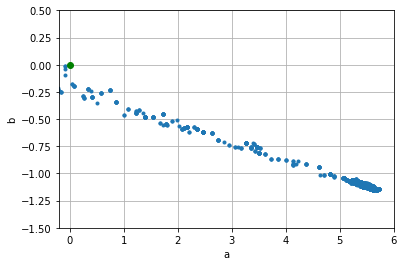

(5.474598201746915, -1.11495989727202)

In [77]:
#Valor inicial de los valores
tp=(0,0)
#Número de pasos
N=10000
#Vector donde se guardan las nuevas coordenadas de a
ap=[]
#Vector donde se guardan las nuevas coordenadas de b
bp=[]
#Guardo los valores iniciales de a y b
ap.append(tp[0])
bp.append(tp[1])
postp=[]
postp.append(tp)
for i in range(N): 
    aux=sample(*postp[i])
    ap.append(aux[0])
    bp.append(aux[1])
    postp.append(aux)
    
#Gráfica de los puntos que se van generando
plt.plot(ap,bp,'.')
plt.plot(tp[0],tp[1],'go')
plt.xlabel('a')
plt.ylabel('b')
plt.xlim((-0.2, 6))
plt.ylim((-1.5, 0.5))
plt.grid(True)
plt.show()
postp[N]

In [78]:
len(postp)

10001

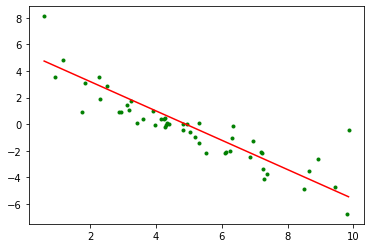

In [66]:
#Línea que se genera con los datos
ymodel=postp[N][0]+postp[N][1]*x
plt.plot(x,y,'g.')
plt.plot(x,ymodel,'r')
plt.show()

(array([9.651e+03, 3.100e+01, 4.000e+01, 7.500e+01, 6.100e+01, 5.700e+01,
        2.700e+01, 4.000e+01, 1.400e+01, 5.000e+00]),
 array([-1.15269109, -1.03742198, -0.92215287, -0.80688376, -0.69161465,
        -0.57634554, -0.46107644, -0.34580733, -0.23053822, -0.11526911,
         0.        ]),
 <BarContainer object of 10 artists>)

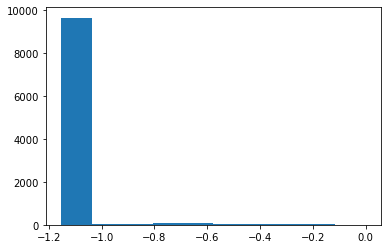

In [79]:
plt.hist(bp)

In [4]:
#valores iniciales de los parámetros 
#theta_start = (1, 1)
t=(-1.0,4.5)
post=[]
post.append(t)
for i in range(5):
    post.append(sample(*post[i]))
    
